## Machine Learning using Long Short-Term Memory (LSTM) Network for Indonesia Stock Exchange

Python 3 has libraries to do machine learning. Based on historical data, machine learning is predicting future data.
The libraries are :
pandas : an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools.
Keras  : a high-level neural networks library and capable of running on top of TensorFlow, CNTK, or Theano. 
         It was developed with a focus on enabling fast experimentation.
         
In here, we have scripts by leveraging python libraries to create machine learning. The machine learning is taking Indonesia Stock Exchange historical data, and then use it to train neural network. The neural network is used to predict the future stock price.

There are several steps in the python script.
1. loading historical data to memory by using pandas library
2. we need to decide, which data is taken for learning. In here, we are using close price as learning data.
   the learning data is called feature.
3. the feature is scaled using MinMaxScaler to scale the original value to value between 0 to 1.
4. after scaling, we are splitting feature to train data and test data
5. We are using time series analysis refers to the analysis of change in the trend of the data over a period of time.
   The model that we are using is : Long Short-Term Memory (LSTM) networks
6. Train the model using historical data. The longer period of historical data, the better result is expected for prediction.
7. Using test data which we got from step 4, we are testing the trained model, for predicting future value.

### importing all necessary modules

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output


Using TensorFlow backend.


### listing all csv files in a directory, and put the list in list

In [2]:
#print(check_output(["ls", "/Users/asulita1/Downloads/Saham"]).decode("utf8"))

#print(check_output(["dir", "C:\Users\asulita1\Downloads\Saham"]).decode("utf8"))

import os
list_file = os.listdir("/Users/asulita1/downloads/saham/")

In [3]:
print(list_file)

['MS181101.txt', 'MS181102.txt', 'MS181105.txt', 'MS181106.txt', 'MS181107.txt', 'MS181108.txt', 'MS181109.txt', 'MS181112.txt', 'MS181113.txt', 'MS181114.txt', 'MS181115.txt', 'MS181116.txt', 'MS181119.txt', 'MS181121.txt', 'MS181122.txt', 'MS181123.txt', 'MS181126.txt', 'MS181127.txt', 'MS181128.txt', 'MS181129.txt', 'MS181130.txt', 'MS181203.txt', 'MS181204.txt', 'MS181205.txt', 'MS181206.txt', 'MS181207.txt', 'MS181210.txt', 'MS181211.txt', 'MS181212.txt', 'MS181213.txt', 'MS181214.txt', 'MS181217.txt', 'MS181218.txt', 'MS181219.txt', 'MS181220.txt', 'MS181221.txt', 'MS181226.txt', 'MS181227.txt', 'MS181228.txt', 'MS190102.txt', 'MS190103.txt', 'MS190104.txt', 'MS190107.txt', 'MS190108.txt', 'MS190109.txt', 'MS190110.txt', 'MS190111.txt', 'MS190114.txt', 'MS190115.txt', 'MS190116.txt', 'MS190117.txt', 'MS190118.txt', 'MS190121.txt', 'MS190122.txt', 'MS190123.txt', 'MS190124.txt', 'MS190125.txt', 'MS190128.txt', 'MS190129.txt', 'MS190130.txt', 'MS190131.txt', 'MS190201.txt', 'MS1902

### importing stock data to dataframe

In [4]:
full_df = pd.DataFrame()
for each in list_file:
    str1 = "/Users/asulita1/downloads/saham/"+each
    day_df = pd.read_csv(str1)
    full_df = full_df.append(day_df,ignore_index = True)


### GET CLOSING PRICE OF A STOCK, IN THIS CASE, BMRI (BANK MANDIRI)

In [5]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77641 entries, 0 to 77640
Data columns (total 7 columns):
<date>      77641 non-null object
<ticker>    77641 non-null object
<open>      77641 non-null float64
<high>      77641 non-null float64
<low>       77641 non-null float64
<close>     77641 non-null float64
<volume>    77641 non-null int64
dtypes: float64(4), int64(1), object(2)
memory usage: 4.1+ MB


### Using BMRI stock ticker for training and testing model

In [6]:
cl = full_df.loc[full_df.loc[:,'<ticker>']=='BMRI','<close>']

### Scale the data using MinMaxScaler

In [7]:
scl = MinMaxScaler()

cl = cl.as_matrix()
cl = cl.reshape(cl.shape[0],1)
cl = scl.fit_transform(cl)
cl

C:\Users\asulita1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[0.44680851],
       [0.61702128],
       [0.57446809],
       [0.55319149],
       [0.55319149],
       [0.68085106],
       [0.44680851],
       [0.23404255],
       [0.38297872],
       [0.36170213],
       [0.59574468],
       [0.63829787],
       [0.65957447],
       [0.4893617 ],
       [0.53191489],
       [0.5106383 ],
       [0.57446809],
       [0.63829787],
       [0.59574468],
       [0.80851064],
       [0.59574468],
       [0.76595745],
       [0.80851064],
       [0.74468085],
       [0.65957447],
       [0.68085106],
       [0.61702128],
       [0.63829787],
       [0.65957447],
       [0.85106383],
       [0.74468085],
       [0.59574468],
       [0.55319149],
       [0.61702128],
       [0.5106383 ],
       [0.44680851],
       [0.44680851],
       [0.4893617 ],
       [0.57446809],
       [0.53191489],
       [0.40425532],
       [0.63829787],
       [0.61702128],
       [0.55319149],
       [0.74468085],
       [0.85106383],
       [0.85106383],
       [0.851

### Create a function to process the data into 7 day look back slices

In [8]:

def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)

X,y = processData(cl,7)

X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

83
21
83
21


In [9]:
#Build the model
model = Sequential()
model.add(LSTM(256,input_shape=(7,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 83 samples, validate on 21 samples
Epoch 1/300
83/83 [==============================] - 2s 23ms/step - loss: 0.3256 - val_loss: 0.2072
Epoch 2/300
83/83 [==============================] - 0s 2ms/step - loss: 0.1306 - val_loss: 0.0644
Epoch 3/300
83/83 [==============================] - 0s 2ms/step - loss: 0.0398 - val_loss: 0.0370
Epoch 4/300
83/83 [==============================] - 0s 2ms/step - loss: 0.0578 - val_loss: 0.0341
Epoch 5/300
83/83 [==============================] - 0s 2ms/step - loss: 0.0361 - val_loss: 0.0374
Epoch 6/300
83/83 [==============================] - 0s 2ms/step - loss: 0.0273 - val_loss: 0.0558
Epoch 7/300
83/83 [==============================] - 0s 2ms/step - loss: 0.0374 - val_loss: 0.0615
Epoch 8/300
83/83 [==============================] - 0s 2ms/step - loss: 0.0394 - val_loss: 0.0526
Epoch 9/300
83/83 [========================

83/83 [==============================] - 0s 1ms/step - loss: 0.0173 - val_loss: 0.0220
Epoch 77/300
83/83 [==============================] - 0s 1ms/step - loss: 0.0173 - val_loss: 0.0219
Epoch 78/300
83/83 [==============================] - 0s 1ms/step - loss: 0.0172 - val_loss: 0.0219
Epoch 79/300
83/83 [==============================] - 0s 2ms/step - loss: 0.0171 - val_loss: 0.0218
Epoch 80/300
83/83 [==============================] - 0s 2ms/step - loss: 0.0171 - val_loss: 0.0217
Epoch 81/300
83/83 [==============================] - 0s 2ms/step - loss: 0.0170 - val_loss: 0.0217
Epoch 82/300
83/83 [==============================] - 0s 2ms/step - loss: 0.0169 - val_loss: 0.0216
Epoch 83/300
83/83 [==============================] - 0s 2ms/step - loss: 0.0169 - val_loss: 0.0216
Epoch 84/300
83/83 [==============================] - 0s 2ms/step - loss: 0.0168 - val_loss: 0.0215
Epoch 85/300
83/83 [==============================] - 0s 2ms/step - loss: 0.0167 - val_loss: 0.0215
Epoch 86/300


83/83 [==============================] - 0s 2ms/step - loss: 0.0134 - val_loss: 0.0185
Epoch 158/300
83/83 [==============================] - 0s 1ms/step - loss: 0.0135 - val_loss: 0.0185
Epoch 159/300
83/83 [==============================] - 0s 1ms/step - loss: 0.0135 - val_loss: 0.0178
Epoch 160/300
83/83 [==============================] - 0s 2ms/step - loss: 0.0132 - val_loss: 0.0177
Epoch 161/300
83/83 [==============================] - 0s 2ms/step - loss: 0.0131 - val_loss: 0.0181
Epoch 162/300
83/83 [==============================] - 0s 2ms/step - loss: 0.0133 - val_loss: 0.0180
Epoch 163/300
83/83 [==============================] - 0s 2ms/step - loss: 0.0131 - val_loss: 0.0178
Epoch 164/300
83/83 [==============================] - 0s 2ms/step - loss: 0.0130 - val_loss: 0.0181
Epoch 165/300
83/83 [==============================] - 0s 2ms/step - loss: 0.0130 - val_loss: 0.0183
Epoch 166/300
83/83 [==============================] - 0s 2ms/step - loss: 0.0130 - val_loss: 0.0182
Epoc

83/83 [==============================] - 0s 2ms/step - loss: 0.0129 - val_loss: 0.0177
Epoch 239/300
83/83 [==============================] - 0s 1ms/step - loss: 0.0119 - val_loss: 0.0172
Epoch 240/300
83/83 [==============================] - 0s 2ms/step - loss: 0.0117 - val_loss: 0.0180
Epoch 241/300
83/83 [==============================] - 0s 1ms/step - loss: 0.0124 - val_loss: 0.0175
Epoch 242/300
83/83 [==============================] - 0s 2ms/step - loss: 0.0117 - val_loss: 0.0174
Epoch 243/300
83/83 [==============================] - 0s 2ms/step - loss: 0.0116 - val_loss: 0.0182
Epoch 244/300
83/83 [==============================] - 0s 1ms/step - loss: 0.0118 - val_loss: 0.0185
Epoch 245/300
83/83 [==============================] - 0s 2ms/step - loss: 0.0118 - val_loss: 0.0181
Epoch 246/300
83/83 [==============================] - 0s 2ms/step - loss: 0.0117 - val_loss: 0.0183
Epoch 247/300
83/83 [==============================] - 0s 2ms/step - loss: 0.0117 - val_loss: 0.0186
Epoc

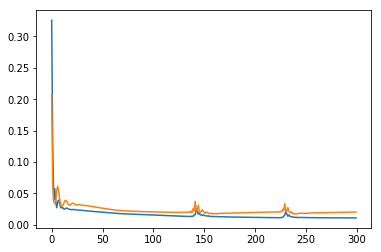

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [11]:
X_test[0]

array([[0.31914894],
       [0.17021277],
       [0.08510638],
       [0.        ],
       [0.0212766 ],
       [0.19148936],
       [0.34042553]])

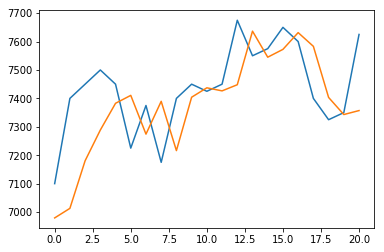

In [12]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))

In [25]:
act = []
pred = []
#for i in range(250):
i=20
Xt = model.predict(X_test[i].reshape(1,7,1))
print('predicted:{0}, actual:{1}'.format(scl.inverse_transform(Xt),scl.inverse_transform(y_test[i].reshape(-1,1))))
pred.append(scl.inverse_transform(Xt))
act.append(scl.inverse_transform(y_test[i].reshape(-1,1)))

predicted:[[7357.145]], actual:[[7625.]]


In [14]:
result_df = pd.DataFrame({'pred':list(np.reshape(pred, (-1))),'act':list(np.reshape(act, (-1)))})

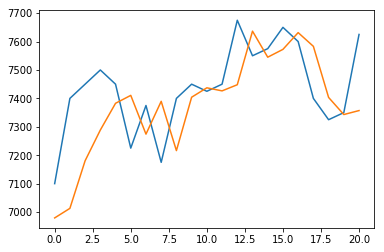

In [15]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))

In [16]:
X_test[12]

array([[0.44680851],
       [0.57446809],
       [0.40425532],
       [0.59574468],
       [0.63829787],
       [0.61702128],
       [0.63829787]])